In [1]:
# Importing required libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


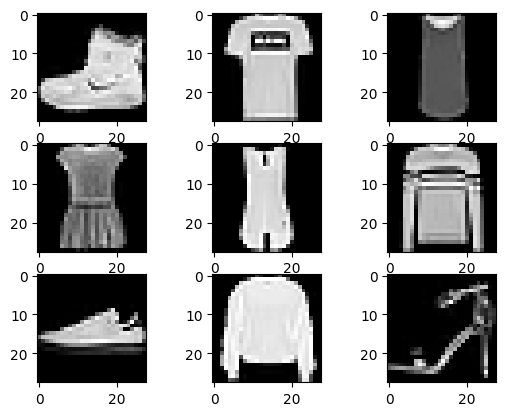

In [2]:
# load dataset
(trainX, y_train), (testX, y_test) = fashion_mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, y_train.shape))
print('Test: X=%s, y=%s' % (testX.shape, y_test.shape))

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [3]:
# Function to reshape images to get features of a single image in to a single array rather than 2d array

def func_reshape_images(img_set):
    final_set = []
    for i in range(len(img_set)):
        final_set.append(img_set[i].reshape(-1))
        
    final_set = np.array(final_set)
    
    return final_set

In [4]:
# Reshaping the images for PCA
X_train = func_reshape_images(trainX)
X_test = func_reshape_images(testX)

print(X_train.shape, X_test.shape) # 28*28

(60000, 784) (10000, 784)


In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [6]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

# PCA

In [7]:
from sklearn import decomposition

# Trying to fit PCA without any criteria to see the eigenvalues
pca = decomposition.PCA()
pca.fit(X_train)

PCA()

In [8]:
print(pca.components_.shape)

(784, 784)


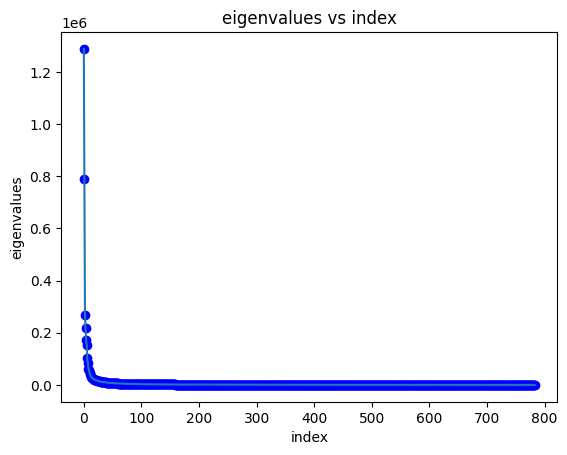

In [9]:
# Getting the eigenvalues
eigenValues = pca.explained_variance_
y = [i for i in range(len(eigenValues))]

# Displaying the eigenvalues to pick the top ones
plt.scatter(y, eigenValues, c='blue')
plt.plot(y, eigenValues)
plt.xlabel('index')
plt.ylabel('eigenvalues')
plt.title('eigenvalues vs index')
plt.show()

In [11]:
# Considering 5 as our components to choose eigen vectors

pca_updated = decomposition.PCA(n_components=5)
pca_updated.fit(X_train)

PCA(n_components=5)

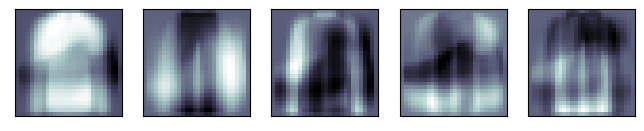

In [12]:
# The principal components measure deviations about this mean along orthogonal axes
fig = plt.figure(figsize=(8, 6))
for i in range(len(pca_updated.components_)):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca_updated.components_[i].reshape(trainX[0].shape), cmap=plt.cm.bone)

In [13]:
# Transforming the train and test data to 5 features
X_train_pca = pca_updated.transform(X_train)
X_test_pca = pca_updated.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 5)
(10000, 5)


In [14]:
# Features of the first train image
X_train_pca[i]

array([  804.11925782, -1201.16871981,  -744.37712151,  -269.63011258,
         404.98267872])

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating KNN model
clf = KNeighborsClassifier(1)

# Fitting the model on train data
clf.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Predicting the labels for test data
Y_pred = clf.predict(X_test_pca)

print("1KNN Accuracy: " + str(accuracy_score(y_test, Y_pred)))

1KNN Accuracy: 0.6976


Comparision between predicted and actual output

In [ ]:
Y_pred[0:20]

In [ ]:
y_test[0:20]

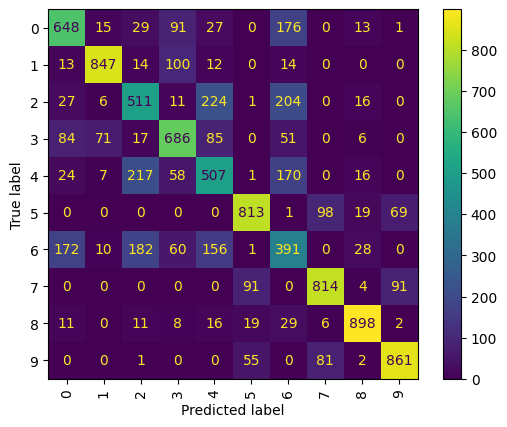

In [17]:
# Displaying the confusion matrix
from sklearn import metrics
from matplotlib import pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, Y_pred, xticks_rotation='vertical', display_labels = [i for i in range(10)])

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logr_model = LogisticRegression(max_iter=100)

In [34]:
logr_model.fit(X_train_pca, y_train)

C:\Users\rammo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
Y_pred_logr = logr_model.predict(X_test_pca)

print("Logistic Regression Accuracy: " + str(accuracy_score(y_test, Y_pred_logr)))

Logistic Regression Accuracy: 0.6847
